In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np
import warnings
import seaborn as sns
import matplotlib.colors as clr
color_self = clr.LinearSegmentedColormap.from_list('pink_green', ['#3AB370',"#EAE7CC","#FD1593"], N=256)

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [2]:
adata_in = sc.read_h5ad('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/adata_processed.h5ad')
allen_region = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/allen_region.csv')
adata_in.obs['region'] = allen_region['region'].values
meta = pd.read_csv('/mnt/Data16Tc/home/haichao/code/SpaCon/Data/N_20231213_zxw/mouse_3/cell_metadata_with_cluster_annotation.csv')
meta = meta.set_index('cell_label')
meta = meta.loc[adata_in.obs.index.to_list()]
adata_in.obs['cell_type'] = meta['class'].to_list()

adata_out = sc.read_h5ad('/mnt/Data18Td/Data/haichao/merfish_raw_data_zxw3/out_cell_adata/adata_out_cell_distance_q0.3/after_qc/out_cell_adata_qc.h5ad')
# adata_out = sc.read_h5ad('/mnt/Data18Td/Data/haichao/merfish_raw_data_zxw3/out_cell_adata/adata_out_cell_distance_q0.3/after_qc/Zhuang-ABCA-3.001.h5ad')
adata_out.obs['region'] = adata_in.obs.loc[adata_out.obs_names]['region'].values
adata_in.obs

,brain_section_label,x,y,z,x_ccf,y_ccf,z_ccf,region,cell_type
cell_label,,,,,,,,,
198904341065180396762707397604803217407,Zhuang-ABCA-3.023,49.206853,44.877634,12.168155,4.920685,4.487763,1.216815,SSs1,33 Vascular
252199681526991424029643077826220097990,Zhuang-ABCA-3.023,48.973992,44.813761,12.179006,4.897399,4.481376,1.217901,SSs1,33 Vascular
277720971126854564514249564750701518375,Zhuang-ABCA-3.023,48.791066,44.577722,12.192707,4.879107,4.457772,1.219271,SSs1,33 Vascular
31551867344111790264292067056219852271,Zhuang-ABCA-3.023,48.830489,44.426120,12.195078,4.883049,4.442612,1.219508,SSs1,33 Vascular
131102494428104399865219008178262036485,Zhuang-ABCA-3.023,48.308843,43.028156,12.267879,4.830884,4.302816,1.226788,SSs1,34 Immune
...,...,...,...,...,...,...,...,...,...
318102106429791409781741726367984532777,Zhuang-ABCA-3.009,131.090716,69.334275,41.436743,13.109072,6.933427,4.143674,MDRNd,30 Astro-Epen
35262847161560382172299767067854387528,Zhuang-ABCA-3.009,131.216032,69.494070,41.351034,13.121603,6.949407,4.135103,MDRNd,33 Vascular
75415866509570969932943497000463821106,Zhuang-ABCA-3.009,131.415152,70.764504,40.800403,13.141515,7.076450,4.080040,sctd,24 MY Glut


In [3]:
sc.pp.normalize_total(adata_in, target_sum=1e4)
sc.pp.log1p(adata_in)
sc.pp.normalize_total(adata_out, target_sum=1e4)
sc.pp.log1p(adata_out)

In [4]:
adata_in.obs['ct'] = adata_in.obs['cell_type']
adata_in.obs.loc[adata_in.obs['cell_type'].str.contains('Glut'), 'ct'] = 'Glut'
adata_in.obs.loc[adata_in.obs['cell_type'].str.contains('GABA'), 'ct'] = 'GABA'
adata_in = adata_in[adata_in.obs['ct'] != '32 OEC']
adata_in.obs['ct'].unique()

array(['33 Vascular', '34 Immune', '31 OPC-Oligo', '30 Astro-Epen',
       'GABA', 'Glut', '21 MB Dopa', '22 MB-HB Sero'], dtype=object)

In [5]:
ctx_43_regions = ['FRP', 'MOp', 'MOs', 'SSp-n', 'SSp-bfd', 'SSp-ll', 'SSp-m', 'SSp-ul', 'SSp-tr', 'SSp-un', 'SSs', 'GU', 'VISC', 'AUDd', 'AUDp', 'AUDpo', 'AUDv', 'VISal', 'VISam', 'VISl', 'VISp', 'VISpl', 'VISpm', 'VISli', 'VISpor', 'ACAd', 'ACAv', 'PL', 'ILA', 'ORBl', 'ORBm', 'ORBvl', 'AId', 'AIp', 'AIv', 'RSPagl', 'RSPd', 'RSPv', 'VISa', 'VISrl', 'TEa', 'PERI', 'ECT']


In [6]:
adata_cc_in = adata_in[(adata_in.obs['region'].str.startswith('cc')) & (~adata_in.obs['cell_type'].str.contains('GABA|Glut'))]
adata_cc_in

View of AnnData object with n_obs × n_vars = 15599 × 1122
    obs: 'brain_section_label', 'x', 'y', 'z', 'x_ccf', 'y_ccf', 'z_ccf', 'region', 'cell_type', 'ct'
    uns: 'log1p'

In [7]:
adata_ctx = adata_in[adata_in.obs['region'].str.startswith(tuple(ctx_43_regions))]
adata_ctx = adata_ctx[adata_ctx.obs['cell_type'].str.contains('Glut')]
adata_ctx

View of AnnData object with n_obs × n_vars = 148119 × 1122
    obs: 'brain_section_label', 'x', 'y', 'z', 'x_ccf', 'y_ccf', 'z_ccf', 'region', 'cell_type', 'ct'
    uns: 'log1p'

In [8]:
adata_cc_out = adata_out[adata_out.obs['region'].str.startswith('cc')]
adata_cc_out

View of AnnData object with n_obs × n_vars = 14435 × 1147
    obs: 'totalRNA', 'brain_section_label', 'x', 'y', 'z', 'n_genes_by_counts', 'total_counts', 'region'
    uns: 'log1p'
    obsm: 'spatial'

In [9]:
common_cells = adata_cc_in.obs_names.intersection(adata_cc_out.obs_names)
adata_cc_in = adata_cc_in[common_cells]
adata_cc_out = adata_cc_out[common_cells]

In [10]:
adata_cc_in.obs['cell_type'].value_counts()

31 OPC-Oligo     9402
30 Astro-Epen    2340
33 Vascular       894
34 Immune         526
Name: cell_type, dtype: int64

In [11]:
adata_cc_in.obsm['spatial'] = adata_cc_in.obs[['x', 'y']].values
adata_cc_out.obsm['spatial'] = adata_cc_out.obs[['x', 'y']].values
adata_in.obsm['spatial'] = adata_in.obs[['x', 'y']].values

In [12]:
adata_ctx.obs['DEG'] = 'ctx_glut_in'
adata_cc_out.obs['DEG'] = 'cc_out'
adata_cc_in.obs['DEG'] = 'cc_in'
adata_ctx_cc = ad.concat([adata_ctx, adata_cc_in, adata_cc_out])
adata_ctx_cc.obs

,brain_section_label,x,y,z,region,DEG
207252950882079766503645227815929952400,Zhuang-ABCA-3.023,50.597984,41.393473,12.239274,SSs2/3,ctx_glut_in
311894855078226645952213910865897976013,Zhuang-ABCA-3.023,50.420950,41.271525,12.251970,SSs1,ctx_glut_in
125208524519663791324346814779771999476,Zhuang-ABCA-3.023,50.959183,43.276307,12.158869,SSs2/3,ctx_glut_in
12594778395225515056477813574460470379,Zhuang-ABCA-3.023,49.836112,42.209685,12.238386,SSs1,ctx_glut_in
148621603142722639702356861951538418099,Zhuang-ABCA-3.023,51.023440,42.722536,12.174236,SSs2/3,ctx_glut_in
...,...,...,...,...,...,...
79089257071572594359780469736093814949,Zhuang-ABCA-3.009,74.951639,13.604024,38.481071,ccs,cc_out
92146094126984864052663841225116312773,Zhuang-ABCA-3.009,75.154326,14.108468,38.486841,ccs,cc_out
93045082915409019668907757310610222929,Zhuang-ABCA-3.009,73.220268,13.598299,38.481447,ccs,cc_out
95615023825791199971975610754292794950,Zhuang-ABCA-3.009,74.127226,13.866381,38.486890,ccs,cc_out


In [13]:
sc.tl.rank_genes_groups(adata_ctx_cc, 'DEG', groups=['ctx_glut_in'], reference='cc_in', method='wilcoxon')
a_vs_c = sc.get.rank_genes_groups_df(adata_ctx_cc, group='ctx_glut_in')

sc.tl.rank_genes_groups(adata_ctx_cc, 'DEG', groups=['cc_out'], reference='cc_in', method='wilcoxon')
b_vs_c = sc.get.rank_genes_groups_df(adata_ctx_cc, group='cc_out')

# Find out the gene of expressing closer to A in B
similar_genes = []
for gene in b_vs_c['names']:
    if gene in a_vs_c['names'].values:
        a_logfc = a_vs_c[a_vs_c['names'] == gene]['logfoldchanges'].values[0]
        b_logfc = b_vs_c[b_vs_c['names'] == gene]['logfoldchanges'].values[0]
        # if np.sign(a_logfc) == np.sign(b_logfc) and abs(a_logfc - b_logfc) < 0.4 and a_logfc>2 and b_logfc>2:
        if np.sign(a_logfc) == np.sign(b_logfc) and a_logfc > 2 and b_logfc > 2:
            similar_genes.append(gene)

print(f"similar_genes: {len(similar_genes)}")
print(similar_genes)

B中与A更相似的基因: 26
['Slc17a7', 'Ppp1r1b', 'Stac2', 'Syt17', 'Ccnd2', 'Hs3st4', 'Sv2b', 'Fgf13', 'Caln1', 'Kcnh3', 'Neurod2', 'Pde1a', 'Nxph3', 'Vgf', 'Scn4b', 'Kcnj4', 'Bcl11b', 'Oprm1', 'Gpr88', 'Hrh3', 'Egr3', 'Doc2b', '4930452B06Rik', 'Ankrd63', 'Actn2', 'Cckar']


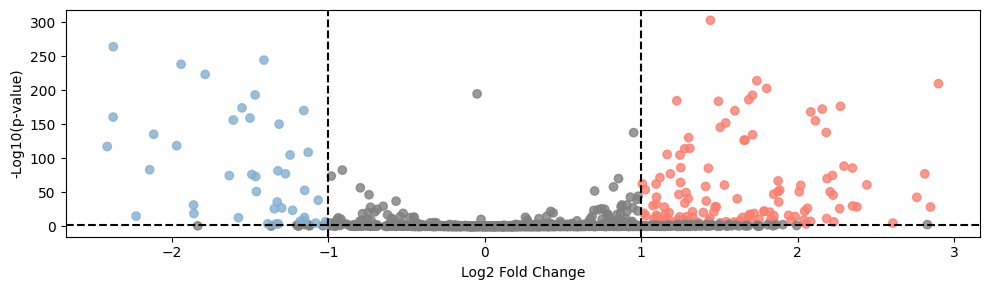

In [15]:
def plot_volcano(df, title, highlight_genes=None):
    plt.figure(figsize=(10, 3))
    
    # -log10(p-value)
    df['log_pval'] = -np.log10(df['pvals'])
    
    # Set point color
    colors = np.where((df['logfoldchanges'] > 1)&(df['log_pval'] > 3), '#fa7f6f', 
                      np.where((df['logfoldchanges'] < -1)&(df['log_pval'] > 3), '#82b0d2', 'grey'))
    
    # Draw all points
    plt.scatter(df['logfoldchanges'], df['log_pval'], c=colors, alpha=0.8)
    
    # If you provide a list of highlighting genes, draw these genes
    if highlight_genes:
        highlight_df = df[df['names'].isin(highlight_genes)]
        plt.scatter(highlight_df['logfoldchanges'], highlight_df['log_pval'], color='red')
        
        # Add tags to highlight points
        for _, row in highlight_df.iterrows():
            plt.annotate(row['names'], (row['logfoldchanges'], row['log_pval']))
    
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10(p-value)')
    # plt.title(title)
    
    # Add threshold line
    plt.axhline(y=-np.log10(0.005), color='black', linestyle='--')
    plt.axvline(x=1, color='black', linestyle='--')
    plt.axvline(x=-1, color='black', linestyle='--')
    
    # plt.show()
    plt.tight_layout()
    # plt.savefig('./in_out_compare/cc_in_out_deg.pdf', format='pdf')

# Use function
plot_volcano(b_vs_c, 'B vs C Differential Expression', highlight_genes=None)


{'heatmap_ax': <AxesSubplot:>, 'groupby_ax': <AxesSubplot:ylabel='ct'>}

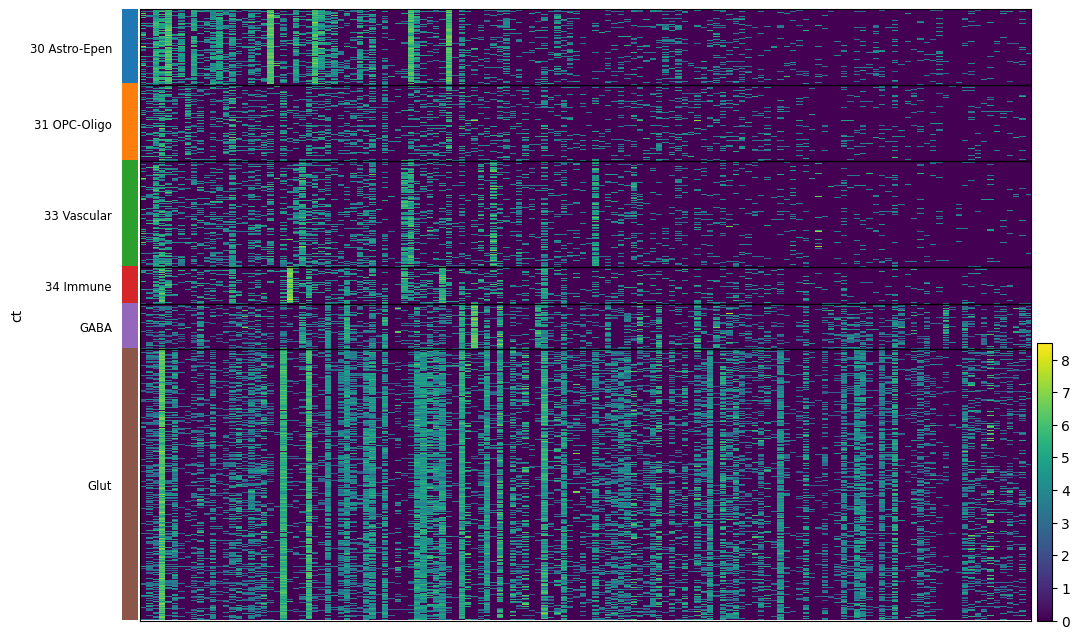

In [16]:
# adata_ctx = adata_in[adata_in.obs['region'].str.startswith(tuple(ctx_43_regions))]
adata_ctx = adata_in[(adata_in.obs['region'].str.startswith('cc')) | (adata_in.obs['region'].str.startswith(tuple(ctx_43_regions)))]
# plt.figure(figsize=(10,6))
sc.pl.heatmap(adata_ctx, b_vs_c[(b_vs_c['logfoldchanges'] >1)&(b_vs_c['log_pval'] > 3)]['names'].tolist(),'ct',var_group_rotation=True, figsize=(12, 8), show=False)
# plt.savefig('./in_out_compare/down_gene_heatmap.png', dpi=500, bbox_inches='tight')

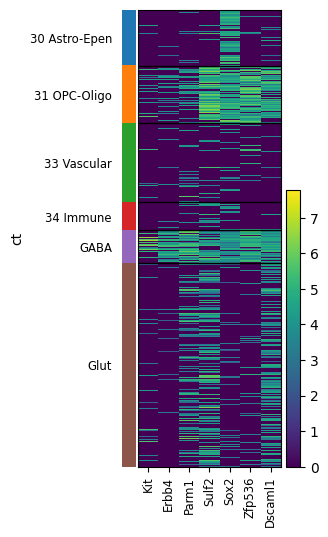

In [21]:
sc.pl.heatmap(adata_ctx, ['Kit','Erbb4', 'Parm1', 'Sulf2', 'Sox2', 'Zfp536', 'Dscaml1'],'ct',var_group_rotation=True, show=False)
plt.tight_layout()
# plt.savefig('./in_out_compare/gaba_oligo_maker.png', dpi=500, bbox_inches='tight')

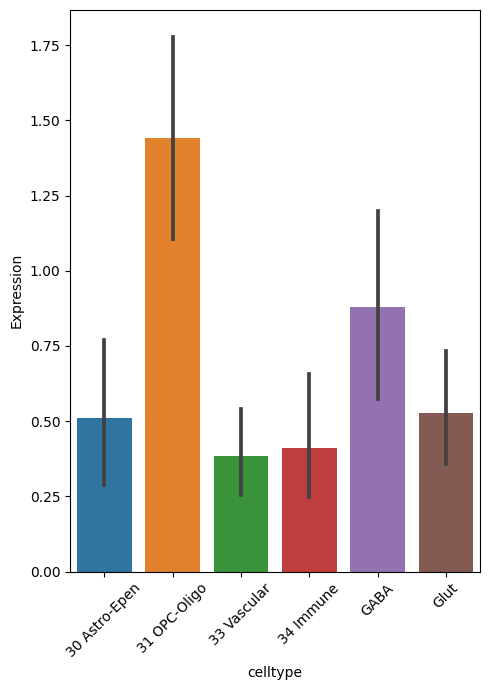

In [23]:
gene_exp = adata_ctx[:, b_vs_c[(b_vs_c['logfoldchanges'] <-1)&(b_vs_c['log_pval'] > 3)]['names'].tolist()].to_df()
gene_exp['celltype'] = adata_ctx.obs['ct']
gene_mean = gene_exp.groupby('celltype').mean()
df_long = gene_mean.reset_index().melt(id_vars='celltype', var_name='Gene', value_name='Expression')
plt.figure(figsize=(5, 7))
sns.barplot(x='celltype', y='Expression', data=df_long)
# sns.swarmplot(x='celltype', y='Expression', data=df_long)
# plt.xlabel('Row Index')
# plt.ylabel('Expression Level')
# plt.title('Violin Plots for Each Row')
plt.xticks(rotation=45)
# plt.show()
plt.tight_layout()
# plt.legend()
# plt.savefig('./in_out_compare/cc_in_out_deg_down_gene_in_ctx.pdf', format='pdf')

### gene exp plot

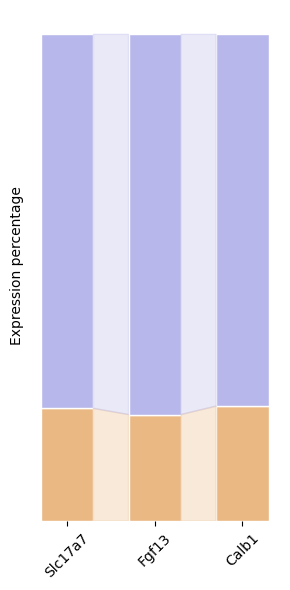

In [120]:
gene = ['Slc17a7', 'Fgf13', 'Calb1']
df = pd.DataFrame(index=['in_cc', 'out'], columns=gene, dtype=float)
for g in gene:
    # in_cell_ctx = adata_ctx[:, g].X.mean()
    in_cell_cc = adata_cc_in[:, g].X.mean()
    out_cell = adata_cc_out[:, g].X.mean()
    all = in_cell_cc + out_cell
    df.loc['in_cc', g] = in_cell_cc / all
    # df.loc['in_ctx', g] = in_cell_ctx / all
    df.loc['out', g] = out_cell / all

# Set data
categories = gene
colors = ['#eab883', '#b7b7eb']
data = df.values

# Create a chart
fig, ax = plt.subplots(figsize=(3, 6))

# Draw a stack of stacks
x = np.arange(len(categories))
bottom = np.zeros(len(categories))
width=0.6
for i, row in enumerate(data):
    ax.bar(x, row, bottom=bottom, color=colors[i], edgecolor='white',width=width)

    # Add percentage tags above each part
    # for j in range(len(categories)):
    #     percent = row[j] * 100  # Convert the percentage to the percentage system
    #     ax.text(x[j], bottom[j] + row[j] / 2, f'{percent:.1f}%', 
    #             ha='center', va='center', color='black', fontsize=10, rotation=90)

    bottom += row

# Add full -coverage ribbon
for j in range(len(categories) - 1):
    left = x[j]+width/2
    right = x[j+1]-width/2
    left_data = data[:, j]
    right_data = data[:, j+1]
    
    left_cumsum = np.cumsum(left_data)
    right_cumsum = np.cumsum(right_data)
    
    # Add all ribbons from the bottom to the top
    for i in range(len(colors)):
        left_bottom = left_cumsum[i-1] if i > 0 else 0
        left_top = left_cumsum[i]
        right_bottom = right_cumsum[i-1] if i > 0 else 0
        right_top = right_cumsum[i]
        
        ax.fill([left, right, right, left],
                [left_bottom, right_bottom, right_top, left_top],
                color=colors[i], alpha=0.3)

# Set chart style
# ax.set_title('Full Coverage Ribbon Stacked Bar Chart')
# ax.set_xlabel('Categories')
ax.set_ylabel('Expression percentage')
plt.xticks(x, rotation=45)
ax.set_xticklabels(categories)
ax.set_yticklabels([])
ax.set_yticks([])

# Remove the coordinate shaft border
for spine in ax.spines.values():
    spine.set_visible(False)

# Display chart
plt.tight_layout()
# plt.savefig('./in_out_compare/in_out_exp.pdf', format='pdf')

### ctx layer maker gene in cc

In [87]:
# adata_ctx.obs['layer'] = adata_ctx.obs['DEG'].astype(str)
adata_ctx = adata_in[adata_in.obs['region'].str.startswith(tuple(ctx_43_regions))]
adata_ctx = adata_ctx[adata_ctx.obs['cell_type'].str.contains('Glut')]

adata_ctx = adata_ctx[:,adata_ctx_cc.var_names]
adata_ctx.obs['layer'] = None
adata_ctx.obs.loc[adata_ctx.obs['region'].str.contains('1'), 'layer'] = 'L1'
adata_ctx.obs.loc[adata_ctx.obs['region'].str.contains('2/3'), 'layer'] = 'L2/3'
adata_ctx.obs.loc[adata_ctx.obs['region'].str.contains('4'), 'layer'] = 'L4'
adata_ctx.obs.loc[adata_ctx.obs['region'].str.contains('5'), 'layer'] = 'L5'
adata_ctx.obs.loc[adata_ctx.obs['region'].str.contains('6'), 'layer'] = 'L6'
# adata.obs.loc[adata.obs['region'].isin(['LP', 'LD']), 'layer'] = 'th'
# adata.obs.loc[adata.obs['region'].str.contains('VISp'), 'layer'] = 'VISp'
# adata_ctx_cc.uns['layer_colors'] = ["#FF420E", "#FFBB00", "#4CB5F5", "#89DA59", "#878787", "#B037C4", '#8C6D31']
adata_ctx = adata_ctx[adata_ctx.obs['layer'] != 'L1']
# adata_ctx = adata_ctx[adata_ctx.obs['layer'] is not None]

         Falling back to preprocessing with `sc.pp.pca` and default params.


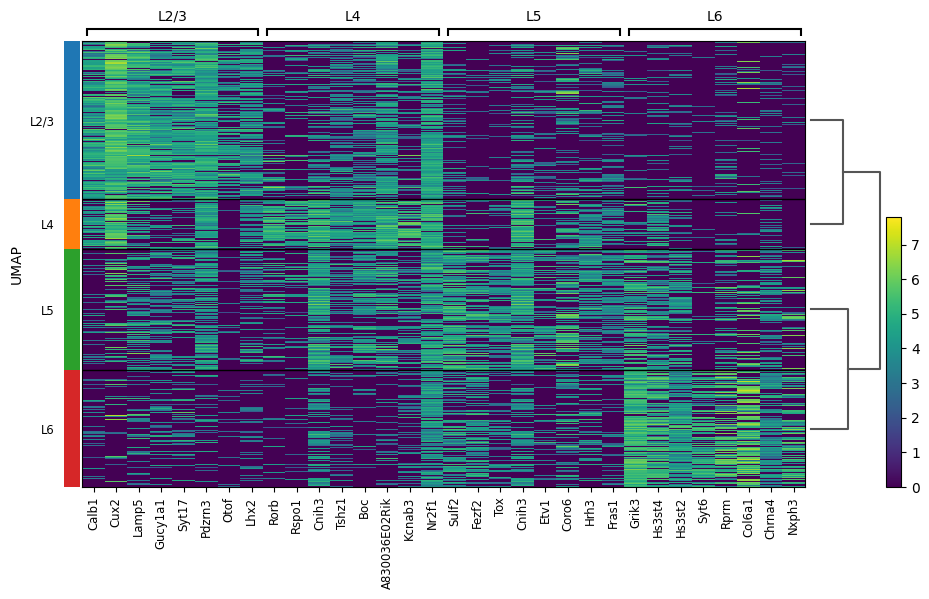

In [90]:
sc.tl.rank_genes_groups(adata_ctx, 'layer', method='wilcoxon')

sc.pl.rank_genes_groups_heatmap(adata_ctx, n_genes=8, show=False)
plt.tight_layout()
plt.savefig('./in_out_compare/ctx_maker.png', dpi=400, bbox_inches='tight')

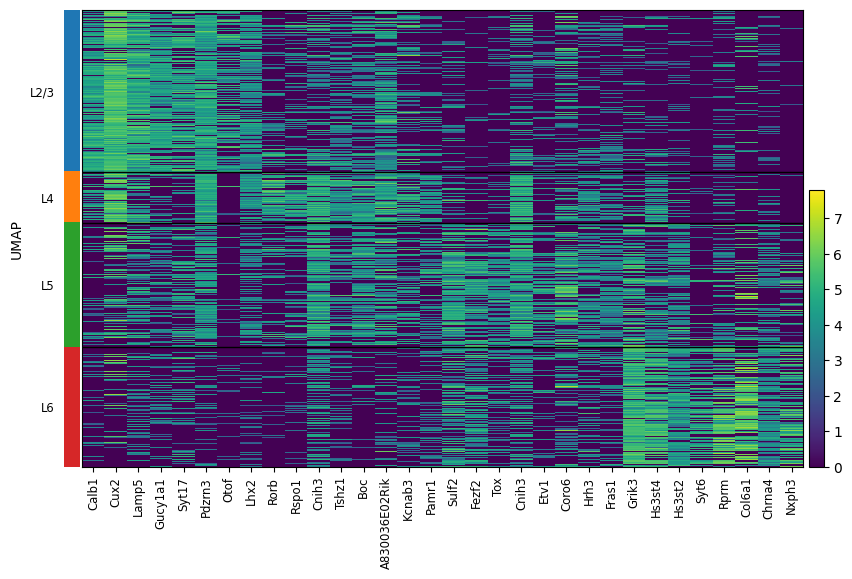

In [95]:

l23 = ['Calb1', 'Cux2', 'Lamp5', 'Gucy1a1', 'Syt17', 'Pdzrn3', 'Otof', 'Lhx2']
l4 = ['Rorb', 'Rspo1', 'Cnih3', 'Tshz1', 'Boc', 'A830036E02Rik', 'Kcnab3', 'Pamr1']
l5 = ['Sulf2', 'Fezf2', 'Tox', 'Cnih3', 'Etv1', 'Coro6', 'Hrh3', 'Fras1']
l6 = ['Grik3', 'Hs3st4', 'Hs3st2', 'Syt6', 'Rprm', 'Col6a1', 'Chrna4', 'Nxph3']
sc.pl.heatmap(
    adata_ctx, 
    var_names=l23 + l4 + l5 + l6, 
    groupby='layer', 
    # cmap='plasma',   
    swap_axes=False,  
    # dendrogram=True  
    show=False   
)
# plt.savefig('./in_out_compare/ctx_maker.png', dpi=400, bbox_inches='tight')

In [ ]:
out_exp_mean = []
in_exp_mean = []
for g, layer in zip([l23, l4, l5, l6], ['23', '4', '5', '6']):
        out_exp = adata_cc_out[:, g].to_df().mean()
        in_exp = adata_cc_in[:, g].to_df().mean()
        out_p = out_exp/(in_exp + out_exp)
        in_p = in_exp/(in_exp + out_exp)
        out_exp_mean.append(out_exp.values)
        in_exp_mean.append(in_exp.values)

        categories = in_exp.index
        values1 = in_p.values
        values2 = out_p.values

        width = 0.6
        fig, ax = plt.subplots(figsize=(8,5))

        ax.bar(categories, values1, width, label='in', color='#6bad6b')
        ax.bar(categories, values2, width, bottom=values1, label='out', color='#e56f5e')

        ax.bar([len(categories)], [in_p.values.mean()], width=1, color='#6bad6b')
        ax.bar([len(categories)], [out_p.values.mean()], width=1, bottom=in_p.values.mean(), color='#e56f5e')
        ax.text(len(categories), in_p.values.mean()/2, f'{in_p.values.mean():.2f}', 
                ha='center', va='center', color='black', fontweight='bold')
        ax.text(len(categories), out_p.values.mean()/2+in_p.values.mean(), f'{out_p.values.mean():.2f}', 
                ha='center', va='center', color='black', fontweight='bold')

        ax.axhline(y=0.5, color='black', linestyle='--', linewidth=2, alpha=0.5)
        ax.set_ylabel('Expression Proportion')
        ax.set_xlabel('Gene')
        all_categories = list(categories) + ['average']
        ax.set_xticks(range(len(all_categories)))
        ax.set_xticklabels(all_categories, rotation=0)

        ax.set_title(f'Layer{layer}')
        ax.legend( bbox_to_anchor=(1, 1), loc='upper left')
        plt.show()
        plt.close()

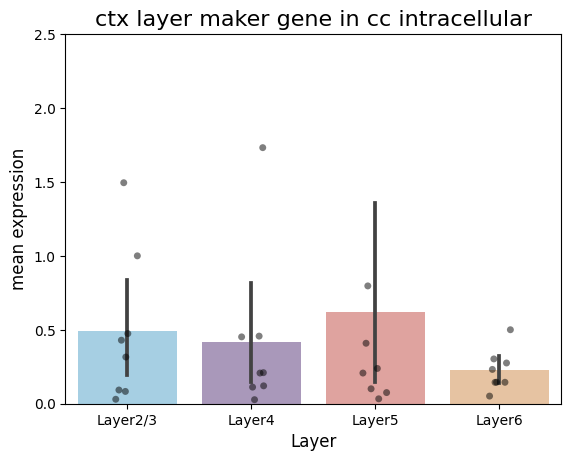

In [92]:
df = pd.DataFrame({
    'Layer2/3': in_exp_mean[0],
    'Layer4': in_exp_mean[1],
    'Layer5': in_exp_mean[2],
    'Layer6': in_exp_mean[3]
})

# Convert the data box to a long format
df_long = df.melt(var_name='Group', value_name='Value')

# Set graphic style and size
# plt.figure(figsize=(12, 6))
colors = ['#9cd2ed', '#a992c0', '#ea9994', '#f2c396']
sns.barplot(x='Group', y='Value', data=df_long, palette=colors)
sns.stripplot(x='Group', y='Value', data=df_long, color='black', alpha=0.5)

# Set the title and label
plt.title('ctx layer maker gene in cc intracellular', fontsize=16)
plt.xlabel('Layer', fontsize=12)
plt.ylabel('mean expression', fontsize=12)
plt.ylim(0, 2.5)

plt.savefig('./in_out_compare/layer_cc_in.pdf', format='pdf')

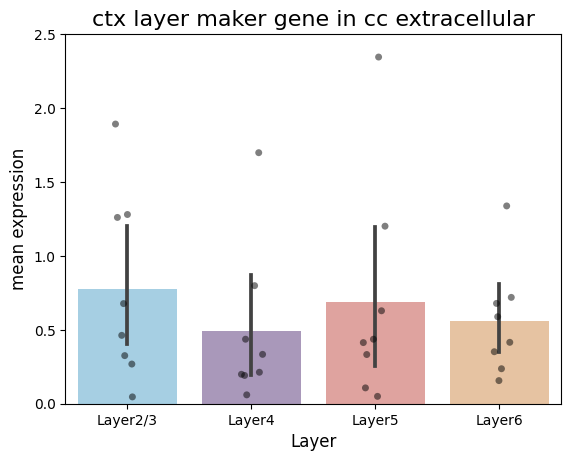

In [93]:
df = pd.DataFrame({
    'Layer2/3': out_exp_mean[0],
    'Layer4': out_exp_mean[1],
    'Layer5': out_exp_mean[2],
    'Layer6': out_exp_mean[3]
})

# Convert the data box to a long format
df_long2 = df.melt(var_name='Group', value_name='Value')

# Set graphic style and size
# plt.figure(figsize=(4, 6))
colors = ['#9cd2ed', '#a992c0', '#ea9994', '#f2c396']
sns.barplot(x='Group', y='Value', data=df_long2, palette=colors)
sns.stripplot(x='Group', y='Value', data=df_long2, color='black', alpha=0.5)

# Set the title and label
plt.title('ctx layer maker gene in cc extracellular', fontsize=16)
plt.xlabel('Layer', fontsize=12)
plt.ylabel('mean expression', fontsize=12)
plt.ylim(0, 2.5)

plt.savefig('./in_out_compare/layer_cc_out.pdf', format='pdf')